# NCBIblast service from BioServices

This example illustrate the NCBIBlast module usage within BioServices.

<i>"The emphasis of NCBIBlast is to find regions of sequence similarity, which will yield functional and evolutionary clues about the structure and function of your novel sequence." -- from NCBIblast web page.</i>

In [1]:
from bioservices import *
%pylab inline --no-import-all
from pylab import hist

Populating the interactive namespace from numpy and matplotlib


<i>First, we need to get a FASTA sequence, which will be the input to the NCBIblast service. </i>

In [2]:
u = UniProt()

In [4]:
sequence = u.retrieve("P43403", "fasta")

# Sequence alignement can be performed with the blastp tool via NCBIblast service.

In [5]:
s = NCBIblast(verbose=False)

In [6]:
jobid = s.run(program="blastp", sequence=sequence, 
              stype="protein", database="uniprotkb", 
              email="test@whatever.co.uk")

In [7]:
print(s.getResult(jobid, "out")[0:1200])

BLASTP 2.2.29+


Reference: Stephen F. Altschul, Thomas L. Madden, Alejandro A.
Schaffer, Jinghui Zhang, Zheng Zhang, Webb Miller, and David J.
Lipman (1997), "Gapped BLAST and PSI-BLAST: a new generation of
protein database search programs", Nucleic Acids Res. 25:3389-3402.


Reference for composition-based statistics: Alejandro A. Schaffer,
L. Aravind, Thomas L. Madden, Sergei Shavirin, John L. Spouge, Yuri
I. Wolf, Eugene V. Koonin, and Stephen F. Altschul (2001),
"Improving the accuracy of PSI-BLAST protein database searches with
composition-based statistics and other refinements", Nucleic Acids
Res. 29:2994-3005.



Database: uniprotkb
           53,372,207 sequences; 17,745,197,851 total letters



Query= sp|P43403|ZAP70_HUMAN Tyrosine-protein kinase ZAP-70 OS=Homo sapiens
GN=ZAP70 PE=1 SV=1

Length=619
                                                                      Score     E
Sequences producing significant alignments:                          (Bits)  Value

lcl|SP:ZAP70_

In [11]:
lines = s.getResult(jobid, "out").split("\n")

In [12]:
entries = [l for l in lines if l.startswith("lcl")]

(array([ 202.,   48.,   12.,   13.,   10.,    3.,    6.,    6.,   80.,
          14.,    4.,   19.,    9.,   31.,    8.,    1.,    8.,    5.,
          12.,    9.]),
 array([  205. ,   258.7,   312.4,   366.1,   419.8,   473.5,   527.2,
          580.9,   634.6,   688.3,   742. ,   795.7,   849.4,   903.1,
          956.8,  1010.5,  1064.2,  1117.9,  1171.6,  1225.3,  1279. ]),
 <a list of 20 Patch objects>)

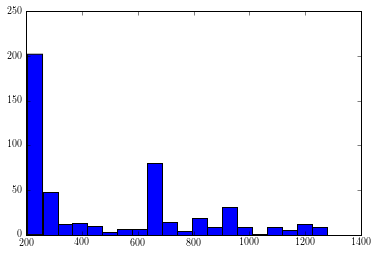

In [13]:
scores = [float(e.split()[-1]) for e in entries]
lengths = [float(e.split()[-2]) for e in entries]
hist(lengths, 20)